In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 실습. 유방암 분류

scikit-learn의 샘플데이터인 유방암(breast cancer) 데이터를 statsmodels의 Logit과  scikit-learn의 LogisticRegression을 사용하여 분석하시오.

#### 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [3]:
cancer = load_breast_cancer()
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

#### 각 피처에 대한 기술통계량

In [4]:
def data_describe(df):
    desc = df.describe().T
    skew = []
    kurtosis = []
    null = []
    for ftr in desc.index:
        skew.append(df[ftr].skew())
        kurtosis.append(df[ftr].kurtosis())
        null.append(df[ftr].isna().sum())
    desc['skewness'] = skew
    desc['kurtosis'] = kurtosis
    desc['n_null'] = null
    return desc

In [5]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
cancer_desc = data_describe(cancer_df)
cancer_desc

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,n_null
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.942380,0.845522,0
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0.650450,0.758319,0
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0.990650,0.972214,0
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,1.645732,3.652303,0
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.456324,0.855975,0
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,1.190123,1.650130,0
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,1.401180,1.998638,0
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,1.171180,1.066556,0
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.725609,1.287933,0
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,1.304489,3.005892,0


#### 각 피처에 대한 분포 시각화

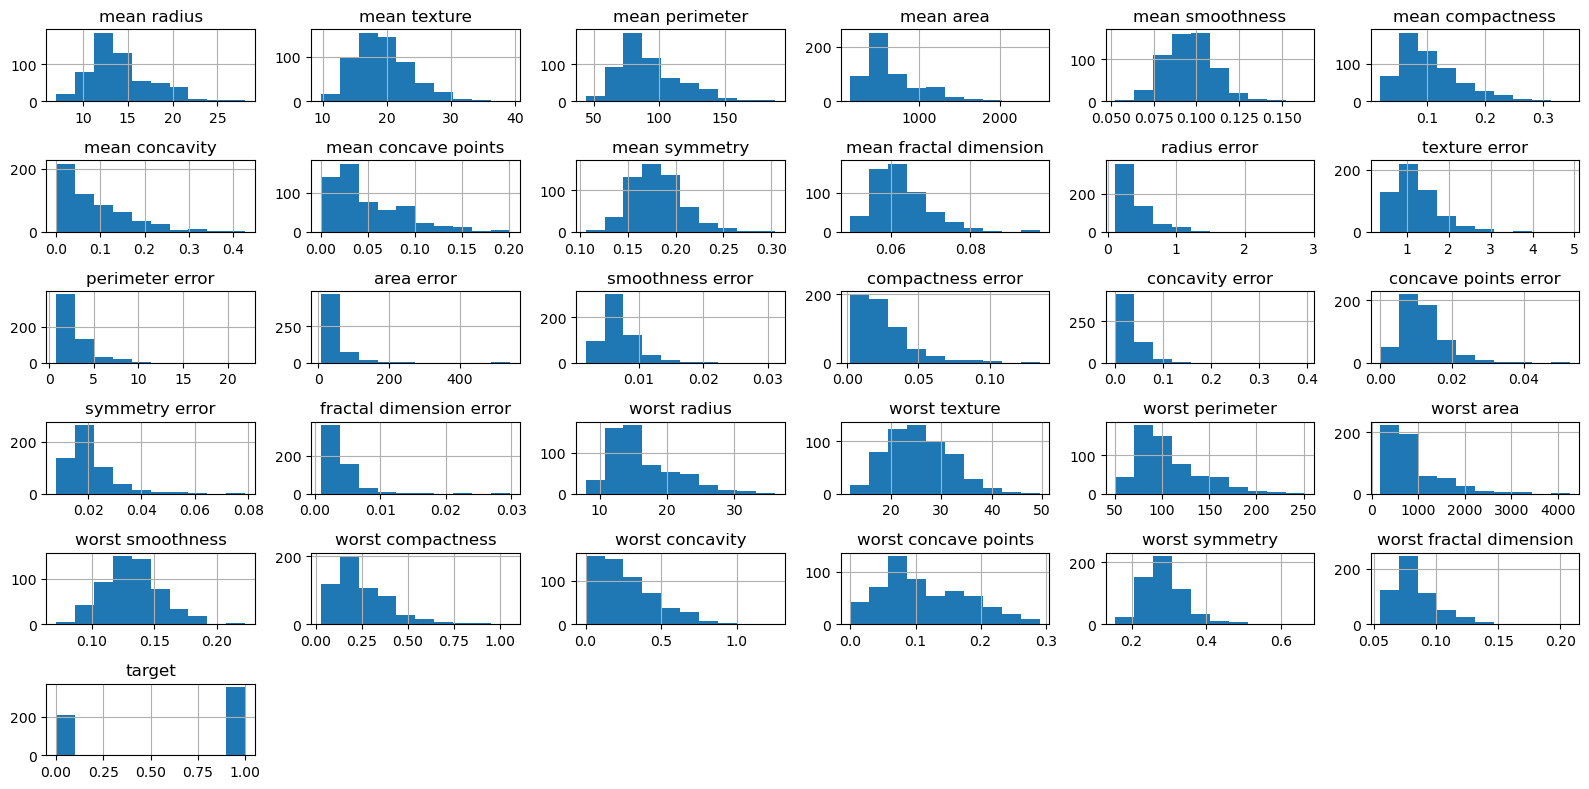

In [7]:
cancer_df.hist(figsize=(16,8))
plt.tight_layout()
plt.show()

#### 데이터 전처리

- 데이터를 표준화, 로그변환을 수행하는 함수를 작성

#### Split Dataset

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

#### statsmodels의  Logit을 이용하여 학습 및 예측 수행

- 원본데이터와 표준화된 데이터, 로그변환데이터 각각에 대하여 학습하고 예측을 수행하여 그 결과를 비교하시오

In [10]:
# 원본데이터
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

model = sm.Logit(y_train, x_train)
result = model.fit()
result.summary()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
# 표준화 데이터
scaler = StandardScaler()
x = data.data
x_scl= scaler.fit_transform(x)
y = data.target

x_train_scl, x_test_scl, y_train_scl, y_test_scl = train_test_split(x_scl, y, test_size=0.3, random_state=0)

model_stand = sm.Logit(y_train_scl, x_train_scl)
result_stand = model_stand.fit()
result_stand.summary()

In [ ]:
# 로그변환 데이터
x = data.data
x_log = np.log1p(x)
y = data.target

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y, test_size=0.3, random_state=0)

model_log = sm.Logit(y_train_log, x_train_log)
result_log = model_log.fit()
result_log.summary()

#### LogisticRegression을 이용하여 학습 및 예측 수행

- 원본데이터, 표준화된 데이터별로 학습하고 예측을 수행하여 그 결과를 비교하시오

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, roc_curve, classification_report

# 이진 분류 모델의 성능지표
def get_eval_score(test_y, pred, pred_proba_c1= None):
    
    # 혼동행렬(오차행렬)
    confusion = confusion_matrix(test_y, pred)
    # 정밀도(precision)
    precision = precision_score(test_y, pred)
    # 정확도(accuracy_score)
    accuracy = accuracy_score(test_y, pred)
    # 재현율(recall)
    recall = recall_score(test_y, pred)
    # F1 score
    f1 = f1_score(test_y, pred)
    # G-measure -> 정밀도와 재현율의 기하평균 -> np.sqrt(recall_socre*precision_score)
    g = np.sqrt(recall_score(test_y, pred)*precision_score(test_y, pred))

    print(f'confusion matrix:\n{confusion}\n')
    print(f'accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}',end=' ')
    print(f'F1: {f1:.4f}, G: {g:.4f}')
    if pred_proba_c1 is not None:
        auc = roc_auc_score(test_y, pred_proba_c1)
        print(f'auc: {auc:.4f}')

In [21]:
# 원본데이터
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)[:,1]
get_eval_score(y_test, pred, pred_proba)

confusion matrix:
[[ 61   2]
 [  5 103]]

accuracy: 0.9591, precision: 0.9810, recall: 0.9537 F1: 0.9671, G: 0.9672
auc: 0.9947


In [29]:
# 표준화
scaler = StandardScaler()
x = data.data
x_scl= scaler.fit_transform(x)
y = data.target

x_train_scl, x_test_scl, y_train_scl, y_test_scl = train_test_split(x_scl, y, test_size=0.3, random_state=0)

lr_scl = LogisticRegression()
lr_scl.fit(x_train_scl, y_train_scl)
pred_scl = lr_scl.predict(x_test_scl)
pred_proba_scl = lr_scl.predict_proba(x_test_scl)[:,1]
get_eval_score(y_test_scl, pred_scl, pred_proba_scl)

confusion matrix:
[[ 60   3]
 [  1 107]]

accuracy: 0.9766, precision: 0.9727, recall: 0.9907 F1: 0.9817, G: 0.9817
auc: 0.9947


In [27]:
# 로그 변환
x = data.data
x_log = np.log1p(x)
y = data.target

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y, test_size=0.3, random_state=0)

lr_log = LogisticRegression()
lr_log.fit(x_train_log, y_train_log)
pred_log = lr_log.predict(x_test_log)
pred_proba_log = lr.predict_proba(x_test_log)[:,1]
get_eval_score(y_test, pred_log, pred_proba_log)

confusion matrix:
[[ 62   1]
 [  6 102]]

accuracy: 0.9591, precision: 0.9903, recall: 0.9444 F1: 0.9668, G: 0.9671
auc: 0.1911


#### LogisticRegression에서 규제를 적용한 최적의 모델 검증

- 원본데이터, 표준화된 데이터에 대하여 규제를 적용한 최적 모델을 검증하시오

In [ ]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression() 

# C: 1/alpha -> 값이 낮을수록 규제강도가 커짐
params ={'penalty':['l2','l1','none'],
        'C':[0.01, 0.1, 1, 5, 10]}

grid_cv = GridSearchCV(lr_clf3, param_grid = params, scoring= 'accuracy',cv=3)
grid_cv.fit(x_train, y_train)
print(f'Best Params: {grid_cv.best_params_}')
print(f'Best Score: {grid_cv.best_score_:.4f}')

best_pred = grid_cv.best_estimator_.predict(x_test)
get_eval_score(y_test, best_pred)

In [42]:
from sklearn.model_selection import GridSearchCV
# 원본데이터
x = data.data
y = data.target

params ={'penalty':['l2','l1','none'],
        'C':[0.01, 0.1, 1, 5, 10]}

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)
lr1 = LogisticRegression()

grid_cv1 = GridSearchCV(lr1, param_grid = params, scoring= 'accuracy',cv=3)
grid_cv1.fit(x_train1, y_train1)
print(f'Best Params: {grid_cv1.best_params_}')
print(f'Best Score: {grid_cv1.best_score_:.4f}')

best_pred1 = grid_cv1.best_estimator_.predict(x_test1)
best_proba1 = grid_cv1.best_estimator_.predict_proba(x_test1)[:,1]
get_eval_score(y_test1, best_pred1, best_proba1)

Best Params: {'C': 0.01, 'penalty': 'none'}
Best Score: 0.9473
confusion matrix:
[[ 61   2]
 [  7 101]]

accuracy: 0.9474, precision: 0.9806, recall: 0.9352 F1: 0.9573, G: 0.9576
auc: 0.9941


In [41]:
# 표준화
scaler = StandardScaler()
x = data.data
x_scl= scaler.fit_transform(x)
y = data.target

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scl, y, test_size=0.3, random_state=0)
lr2 = LogisticRegression()

grid_cv2 = GridSearchCV(lr2, param_grid = params, scoring= 'accuracy',cv=3)
grid_cv2.fit(x_train2, y_train2)
print(f'Best Params: {grid_cv2.best_params_}')
print(f'Best Score: {grid_cv2.best_score_:.4f}')

best_pred2 = grid_cv2.best_estimator_.predict(x_test2)
best_proba2 = grid_cv2.best_estimator_.predict_proba(x_test2)[:,1]
get_eval_score(y_test2, best_pred2, best_proba2)

Best Params: {'C': 1, 'penalty': 'l2'}
Best Score: 0.9824
confusion matrix:
[[ 60   3]
 [  1 107]]

accuracy: 0.9766, precision: 0.9727, recall: 0.9907 F1: 0.9817, G: 0.9817
auc: 0.9947


In [40]:
# 로그 변환
x = data.data
x_log = np.log1p(x)
y = data.target

x_train3, x_test3, y_train3, y_test3 = train_test_split(x_log, y, test_size=0.3, random_state=0)
lr3 = LogisticRegression()

grid_cv3 = GridSearchCV(lr3, param_grid = params, scoring= 'accuracy',cv=3)
grid_cv3.fit(x_train3, y_train3)
print(f'Best Params: {grid_cv3.best_params_}')
print(f'Best Score: {grid_cv3.best_score_:.4f}')

best_pred3 = grid_cv3.best_estimator_.predict(x_test3)
best_proba3 = grid_cv3.best_estimator_.predict_proba(x_test3)[:,1]

get_eval_score(y_test3, best_pred3, best_proba3)

Best Params: {'C': 0.01, 'penalty': 'none'}
Best Score: 0.9699
confusion matrix:
[[ 61   2]
 [  5 103]]

accuracy: 0.9591, precision: 0.9810, recall: 0.9537 F1: 0.9671, G: 0.9672
auc: 0.9954


|모델|변환|accuracy|precision|recall|F1|G|auc|etc|
|---|---:|---|---|---|---|---|---|---|
|LogisticRegression||0.9591|0.9810|0.9537|0.9671|0.9672|0.9947||
|LogisticRegression|표준화|0.9766|0.9727|0.9907|0.9817|0.9817|0.9947||
|LogisticRegression|로그변환|0.9591|0.9903|0.9444|0.9668|0.9671|0.1911||
|LogisticRegression|규제|0.9474|0.9806|0.9352|0.9573|0.9576|0.9941|Best Params: {'C': 0.01, 'penalty': 'none'}, Best Score: 0.9473|
|LogisticRegression|표준화, 규제|0.9766|0.9727|0.9907|0.9817|0.9817|0.9947|Best Params: {'C': 1, 'penalty': 'l2'}, Best Score: 0.9824|
|LogisticRegression|로그변환, 규제|0.9591|0.9810|0.9537|0.9671|0.9672|0.9954|Best Params: {'C': 0.01, 'penalty': 'none'}, Best Score: 0.9699|


--------------------------------------------